#### Integrantes del grupo de trabajo Nº 7 
    
    Maria Eugenia Bava
    Alejandro Moises Abadi
    Catriel Escobar
    Héctor Marcelo Galimberti 
    Gustavo Daniel Baranda Cabrera
    Gisela Croci
    Gerardo Antonio Castellanos Torres
    
#### Simulación Nº 2 Álbum de figuritas del Mundial Qatar

Armar una simulación basada en $N=100$ repeticiones que permita estimar el promedio de paquetes necesarios para conseguir llenar el álbum de figuritas del Mundial Qatar 2022.
El álbum tiene ``figus_total=860`` y vamos a suponer que el paquete no trae una figurita, sino varias: ``figus_paquete=5``. Además, Panini, empresa creadora del álbum del Mundial Qatar 2022, asegura que NO vienen figuritas repetidas por paquete. Para resolver este problema, podés optar por simularlo de acuerdo con esto que asegura Panini, o no. Es tu elección.

In [33]:
# Cargamos las librerías necesarias para la simulación
# Y definimos unos parámetros estéticos de seaborn
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

# 1:EXPERIMENTO ALEATORIO

figus_total = 860
figus_paquete = 5

# Creamos una lista que representa el album con figus_total de ceros
# El 0 indica que no conseguimos esa figurita y el 1 que sí
def crear_album(figus_total):
    return [0] * figus_total

# Genera un paguete de 5 figuritas sin repetición
def comprar_paquete(figus_total,figus_paquete):
    return rd.sample(range(figus_total),figus_paquete)

# Completa con un 1 las figuritas del álbum
def pegar_figus(album,paquete):
    for figurita in paquete:
        album[figurita] = 1

# Devuelve True si falta alguna figurita o sea encuentra algun 0
def album_incompleto(album):
    return 0 in album

# Cuenta la cantidad de paquetes necesarios hasta completar el álbum
def cuantos_paquetes(figus_total, figus_paquete):
    
    paquetes_comprados = 0
    album = crear_album(figus_total)
    
    while(album_incompleto(album)):
        paquete = comprar_paquete(figus_total,figus_paquete)
        pegar_figus(album,paquete)
        paquetes_comprados += 1
        
    return paquetes_comprados

# 2:MUESTRA ALEATORIA

# Fijamos una semilla y generamos n=100 muestras de cuantos_paquetes y
# la guardamos en muestras.
rd.seed(7)
N = 100

muestras = [cuantos_paquetes(figus_total,figus_paquete) for _ in range(N)]

# 3:PROMEDIO MUESTRAL

# Promedio de lo observado en muestras, es una estimación del promedio
# de paquetes necesarios para completar un álbum del Mundial 
# de 860 figus a partir de N repeticiones. Se redondeo resultado a entero.
promedio_muestral = round(np.mean(muestras))
print(f"Promedio muestral de paquetes necesarios: {promedio_muestral}")

Promedio muestral de paquetes necesarios: 1288


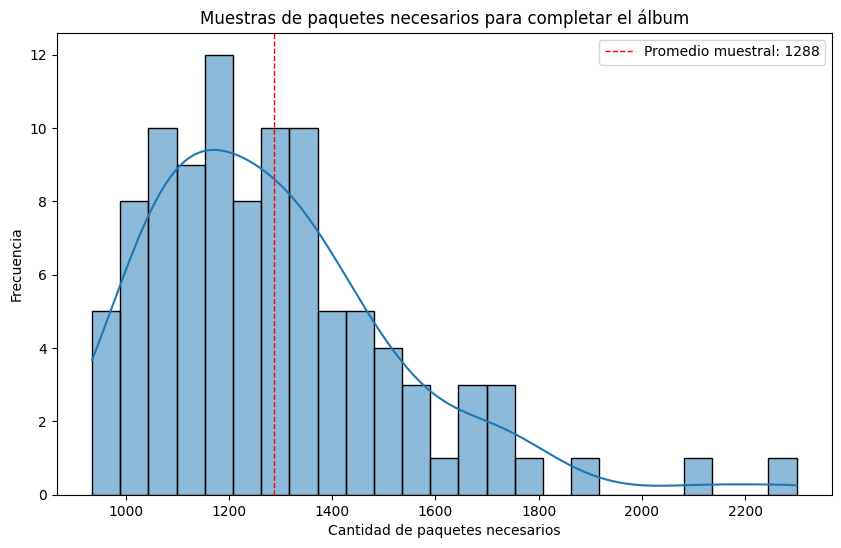

In [30]:
# 4:GRAFICAMOS EN HISTOGRAMA

plt.figure(figsize=(10, 6))
sns.histplot(muestras, bins=25, kde=True)
plt.xlabel('Cantidad de paquetes necesarios')
plt.ylabel('Ocurrencias')
plt.title('Muestras de paquetes necesarios para completar el álbum')
plt.axvline(promedio_muestral, color='red', linestyle='dashed', linewidth=1,
label=f'Promedio muestral: {promedio_muestral}')
plt.legend()
plt.show()